In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Set some display settings.
%matplotlib inline
sns.set(context='notebook')

In [10]:
training_data = pd.read_csv('data/ames_train_cleaned.csv')
testing_data = pd.read_csv('data/ames_test_cleaned.csv')
training_data = training_data.query("Sale_Condition == 'Normal'")
training_data.head()

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice,TotalBathrooms
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,5,2010,WD,Normal,204900,2.0
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,95300,1.0
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,181900,1.5
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,4,2010,WD,Normal,254100,3.5
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,199700,2.5


In [3]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1634 entries, 0 to 1997
Data columns (total 83 columns):
Order              1634 non-null int64
PID                1634 non-null int64
MS_SubClass        1634 non-null int64
MS_Zoning          1634 non-null object
Lot_Frontage       1315 non-null float64
Lot_Area           1634 non-null int64
Street             1634 non-null object
Alley              102 non-null object
Lot_Shape          1634 non-null object
Land_Contour       1634 non-null object
Utilities          1634 non-null object
Lot_Config         1634 non-null object
Land_Slope         1634 non-null object
Neighborhood       1634 non-null object
Condition_1        1634 non-null object
Condition_2        1634 non-null object
Bldg_Type          1634 non-null object
House_Style        1634 non-null object
Overall_Qual       1634 non-null int64
Overall_Cond       1634 non-null int64
Year_Built         1634 non-null int64
Year_Remod/Add     1634 non-null int64
Roof_Style         16

In [41]:
training_data.Paved_Drive.value_counts()

Y    1470
N     128
P      36
Name: Paved_Drive, dtype: int64

In [14]:
training_data['logSalePrice'] = np.log(training_data.SalePrice)

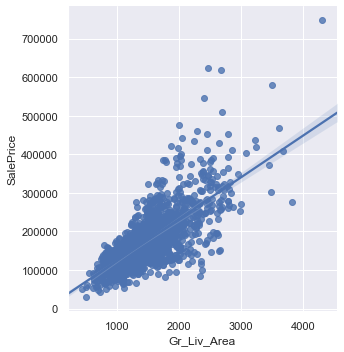

In [15]:
sns.lmplot(x="Gr_Liv_Area", y="SalePrice", data=training_data)

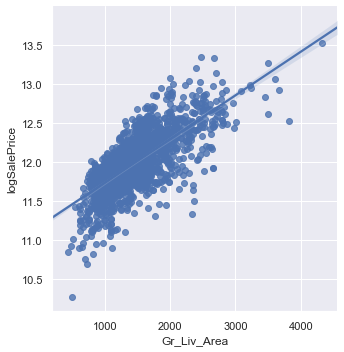

In [16]:
sns.lmplot(x="Gr_Liv_Area", y="logSalePrice", data=training_data)

In [17]:
from statsmodels.formula import api as smf

In [26]:
smf.ols('SalePrice ~ Gr_Liv_Area * TotalBathrooms', data=training_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     882.3
Date:                Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:41:57   Log-Likelihood:                -19811.
No. Observations:                1634   AIC:                         3.963e+04
Df Residuals:                    1630   BIC:                         3.965e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   2.974e+04   9076.789      3.276      0.001    1.19e+04    4.75e+04
Gr_Liv_Area                   55.3671      6.349      8.721      0.000      42.915      67.820
TotalBathrooms              1.373e+04   4010.140      3.424      0.001    5864.916    2.16e+04
Gr_Liv_Area:TotalBathrooms     9.8491      2.315      4.254      0.000       5.308      14.390
==============================================================================
Omnibus:                      375.644   Durbin-Watson:                   1.387
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3250.377
Skew:                           0.822   Prob(JB):                         0.00
Kurtosis:                       9.711   Cond. No.                     3.88e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
smf.ols('logSalePrice ~ Gr_Liv_Area * TotalBathrooms', data=training_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logSalePrice   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     930.0
Date:                Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:42:02   Log-Likelihood:                 82.849
No. Observations:                1634   AIC:                            -157.7
Df Residuals:                    1630   BIC:                            -136.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     10.7807      0.047    230.224      0.000      10.689      10.873
Gr_Liv_Area                    0.0006   3.28e-05     17.440      0.000       0.001       0.001
TotalBathrooms                 0.2907      0.021     14.053      0.000       0.250       0.331
Gr_Liv_Area:TotalBathrooms -7.404e-05   1.19e-05     -6.199      0.000   -9.75e-05   -5.06e-05
==============================================================================
Omnibus:                      150.824   Durbin-Watson:                   1.404
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.117
Skew:                          -0.604   Prob(JB):                     3.69e-64
Kurtosis:                       4.683   Cond. No.                     3.88e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

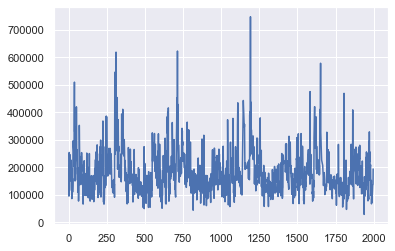

In [7]:
plt.plot(training_data.SalePrice)

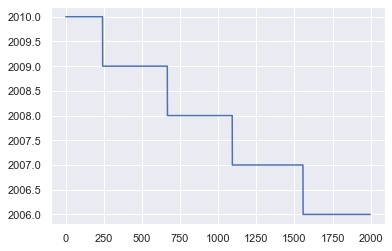

In [9]:
plt.plot(training_data.Yr_Sold)

Compare the effect on validation accuracy of choosing the *first* 500 home sales as our validation set vs the *last* 500 home sales.

* gotta know that the training set is everything else
* validation sets differ by year. first 500 is all recent; last 500 is all old.
* If our goal is to do well on 2011 and beyond, then we'd want to use 2010 as validation.
* If we've only seen some of the data for each year and want to predict the rest, then we'd want to shuffle.

-> Randomize order!

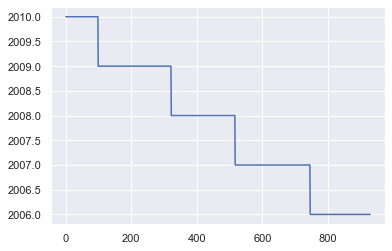

In [11]:
plt.plot(testing_data.Yr_Sold)

# Simple Validation Split

In [12]:
from sklearn import model_selection

In [ ]:
np.random.seed(0)
n_training_obs = len(training_data)

# Pick a random ordering for the observations.
indices = np.random.permutation(n_training_obs)

# Pick a cut-off point
n_validation_obs = int(n_training_obs * .2)

# Split into 

In [13]:
training_data.TotalBathrooms.value_counts()

2.0    508
2.5    315
1.0    256
3.0    203
1.5    178
3.5    151
4.0     13
4.5      5
7.0      3
5.0      2
Name: TotalBathrooms, dtype: int64

Things I need to decide:

* How much to use the sklearn functionality vs do it yourself
* Do we do a simple validation split first?
* Do we shuffle?

Overall goal:

* Increase awareness of what kinds of modeling decisions we can make
  * Model choice: kNN vs LinReg
  * Hyperparameters: number of neighbors
  * Feature engineering:
    * one-hot encode a categorical feature
    * binning continuous features
* Measure effects of modeling decisions on accuracy in training, validation, and test
  * Generalization error is a *noisy measurement*
    * We get different errors for the *same* model on different validation splits
    * We get different errors on the *same* validation data for models trained on different splits

In [28]:
def transform(data):
    X = data[['Gr_Liv_Area', 'TotalBathrooms']].copy()
    return X

all_train_X = transform(training_data)
all_train_y = training_data['SalePrice']

In [29]:
len(all_train_X)

1634

In [30]:
train_X = all_train_X[:500]
train_y = all_train_y[:500]

model = LinearRegression().fit(train_X, train_y)

Evaluate on different validation sets

In [35]:
all_validation_X = all_train_X[500:]
all_validation_y = all_train_y[500:]

valid_mses = []
valid_r2s = []
for i in range(5):
    valid_X = all_validation_X[i::5]
    valid_y = all_validation_y[i::5]

    valid_mses.append(
        metrics.mean_squared_error(valid_y, model.predict(valid_X))
    )
    valid_r2s.append(
        metrics.r2_score(valid_y, model.predict(valid_X))
    )

In [36]:
valid_r2s

[0.7040283232071243,
 0.6144055492606674,
 0.6469444825018951,
 0.612144891607086,
 0.5704668218621982]